# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import sklearn
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the dataset
data=pd.read_csv('/content/drive/My Drive/UTAustinDataScience/datafiles/used_device_data.csv')

In [ ]:
# convert ipnb to HTML file
%cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
#!jupyter nbconvert SLF_Project_LearnerNotebook_FullCode.ipynb --to html

[NbConvertApp] Converting notebook SLF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 2920395 bytes to SLF_Project_LearnerNotebook_FullCode.html


## Data Overview

- Observations
- Sanity checks

In [ ]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


The data contains information about refurbished phones and tablets.

In [ ]:
data.shape

(3454, 15)

The data contains 3454 rows and 15 columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [ ]:
# check for duplicates

data.duplicated().sum()


0

In [ ]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# unique values
#data['brand_name'].unique() #nothing missing
#data['os'].unique() # 4 options, no blanks or missing
#data['4g'].unique()# yes or no
#data['5g'].unique()# yes or no
#data['main_camera_mp'].unique()#has some nan values
#data['selfie_camera_mp'].unique() #has some nan values
#data['int_memory'].unique() #has some nan values
#data['ram'].unique() #has some nan values
#data['battery'].unique()#has some nan values
#data['weight'].unique() #has some nan values
#data['release_year'].unique()


In [ ]:
data['brand_name'].unique().shape

(34,)

####Insight: Examined unique values on all fields. Noted that:


*   Brand names has 34 unique values as well as many of the items being classified as other.
*   There are four distinct values in os
*   The 4g and 5g values are "yes" and "no"
*   There are nan values in main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight



In [ ]:
data.nunique()

brand_name                 34
os                          4
screen_size               142
4g                          2
5g                          2
main_camera_mp             41
selfie_camera_mp           37
int_memory                 15
ram                        12
battery                   324
weight                    555
release_year                8
days_used                 924
normalized_used_price    3094
normalized_new_price     2988
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

###Distribution of Normalized Used Prices

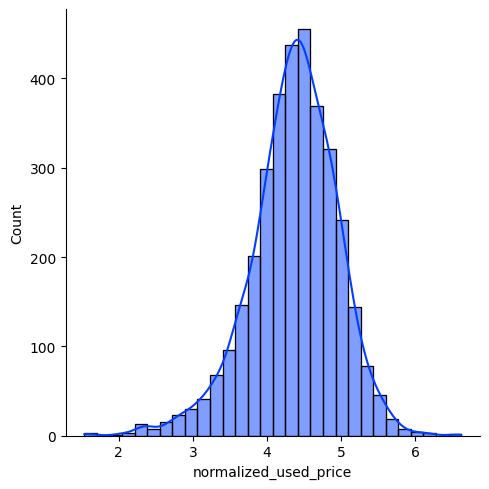

In [ ]:
#  graph distribution of normalized device prices

sns.displot(data['normalized_used_price'], kde=True, bins=30)


<Axes: ylabel='normalized_used_price'>

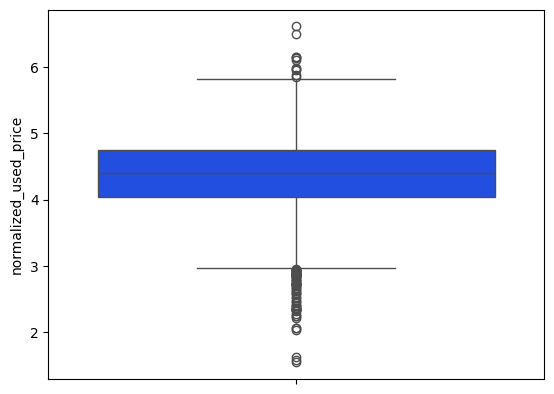

In [ ]:
sns.boxplot(data['normalized_used_price'])

In [ ]:
# Calculate the skewness
normalized_used_price_skew = skew(data['normalized_used_price'])
normalized_used_price_skew

-0.5321066064150582

#### Insight: Normalized prices are clustered between 4 and 5. The distribution is normal and slightly left-skewed.

In [ ]:
# Count the number of devices by operating system
os_counts = data['os'].value_counts()

# Calculate the proportion of Android devices
total_devices = os_counts.sum()
androids = os_counts['Android']
android_percent = androids / total_devices

# Display the results
os_counts, android_percent

(os
 Android    3214
 Others      137
 Windows      67
 iOS          36
 Name: count, dtype: int64,
 0.9305153445280834)

###What percentage of the used device market is dominated by Android devices?

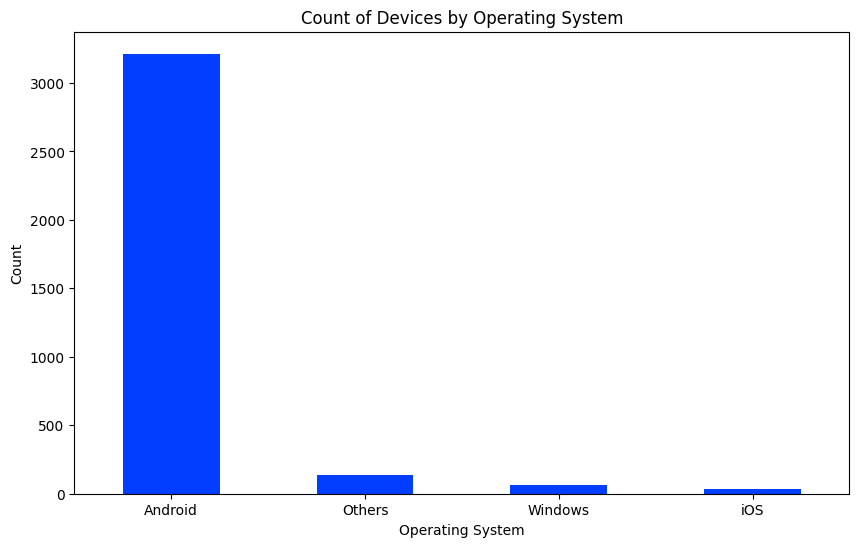

In [ ]:
# Display the results
os_counts, android_percent
plt.figure(figsize=(10, 6))
os_counts.plot(kind='bar')
plt.title('Count of Devices by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### Insight: Android has 93% of the market.

###How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [ ]:
large_batteries = data[data['battery'] > 4500]
large_batteries.shape

(341, 15)

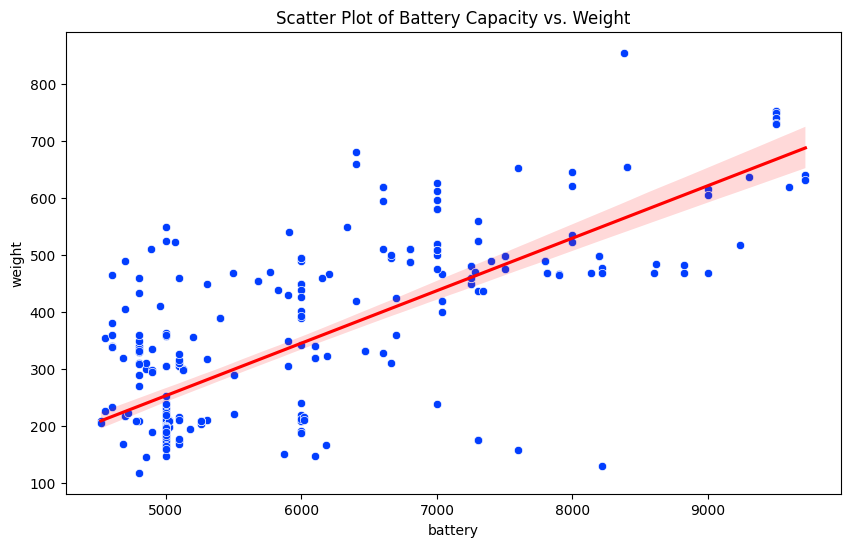

In [ ]:
# Compare weight to batteries over 4500 mah
plt.figure(figsize=(10, 6))
sns.scatterplot(x='battery', y='weight', data=large_batteries)
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Weight (g)')
plt.title('Scatter Plot of Battery Capacity vs. Weight')
sns.regplot(x='battery', y='weight', data=large_batteries, scatter=False, color='red')
plt.show()


####Insight: Weight is highly variable, but generally, there is a positive correlation between the two. As battery capacity increases, so does weight.

### How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [ ]:
# Count the number of devices by operating system
#inches to cm conversion
screen_inches = 6 * 2.54
large_screen = data[data['screen_size'] > screen_inches]
print(screen_inches)
large_screen.head()


15.24


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694


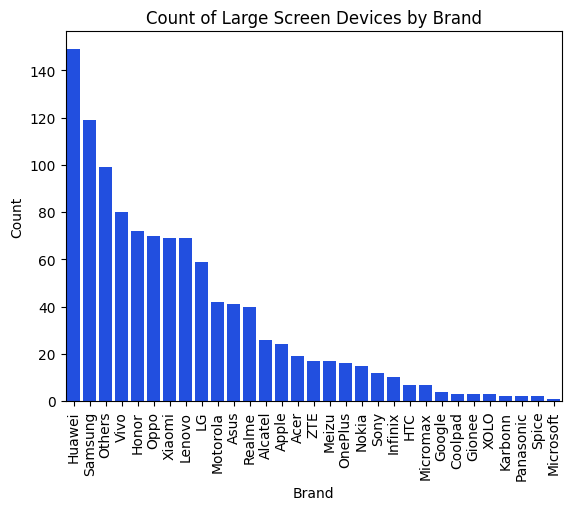

In [ ]:
sns.countplot(x='brand_name', data=large_screen, order=large_screen['brand_name'].value_counts().index)
plt.title('Count of Large Screen Devices by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

####Insight: Again, Huawei offers the most options for large screens, followed Samsung. It is surprising that what we think of as "big" brands, like Apple and Microsoft, offer relatively fewer options.

###What is the distribution of devices offering greater than 8MP selfie cameras across brands?

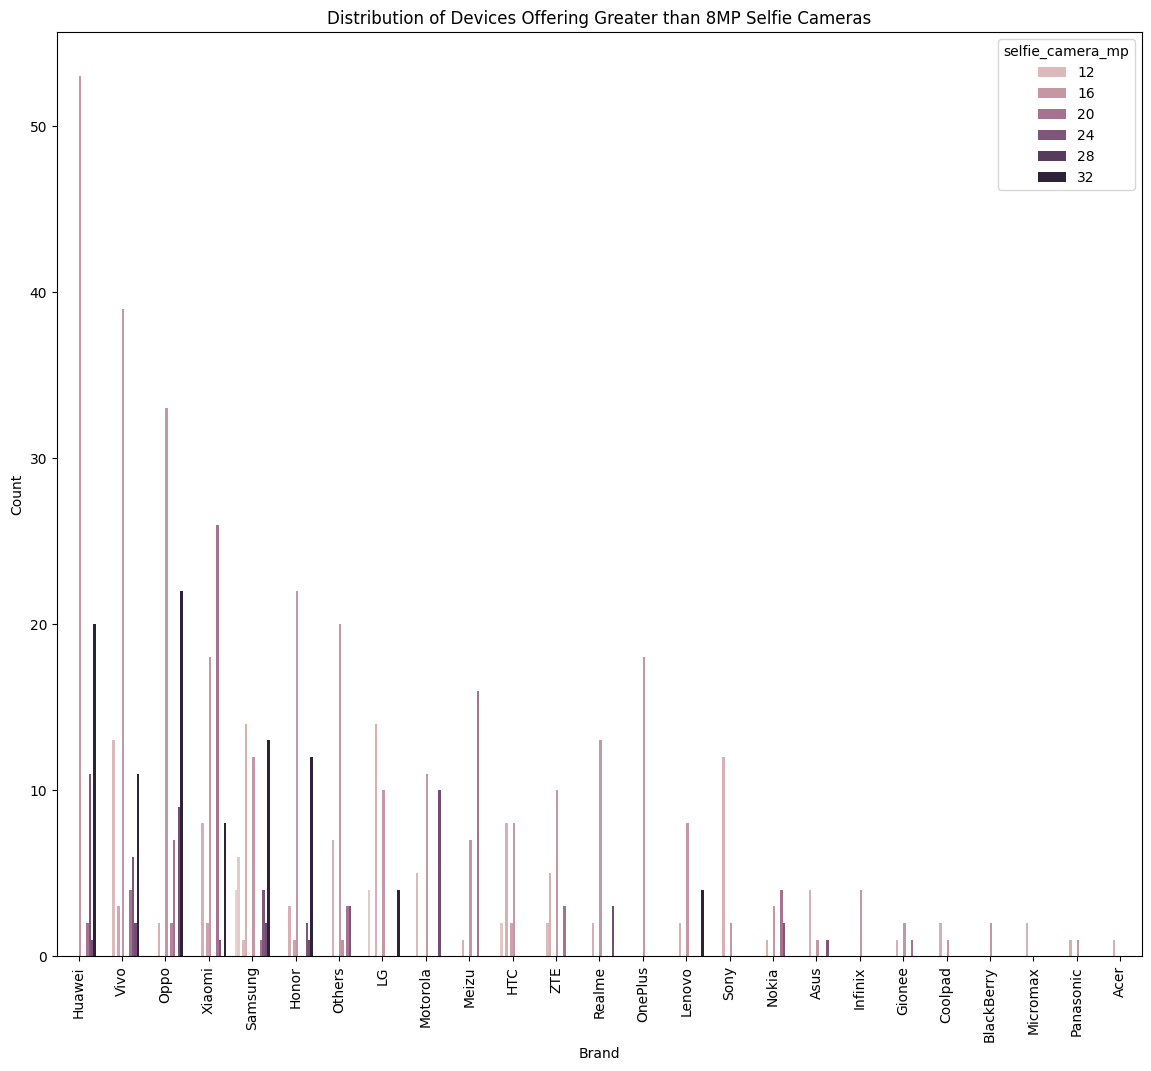

In [ ]:

cameras_eight_mp = data[data['selfie_camera_mp'] > 8]
plt.figure(figsize=(14, 12))
sns.countplot(x='brand_name', hue='selfie_camera_mp', data=cameras_eight_mp, order=cameras_eight_mp['brand_name'].value_counts().index)
plt.title('Distribution of Devices Offering Greater than 8MP Selfie Cameras')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


####Huawei and Vivo offer the most options with 8 MP or greater selfie cameras.

### Which attributes are highly correlated with the normalized price of a used device?

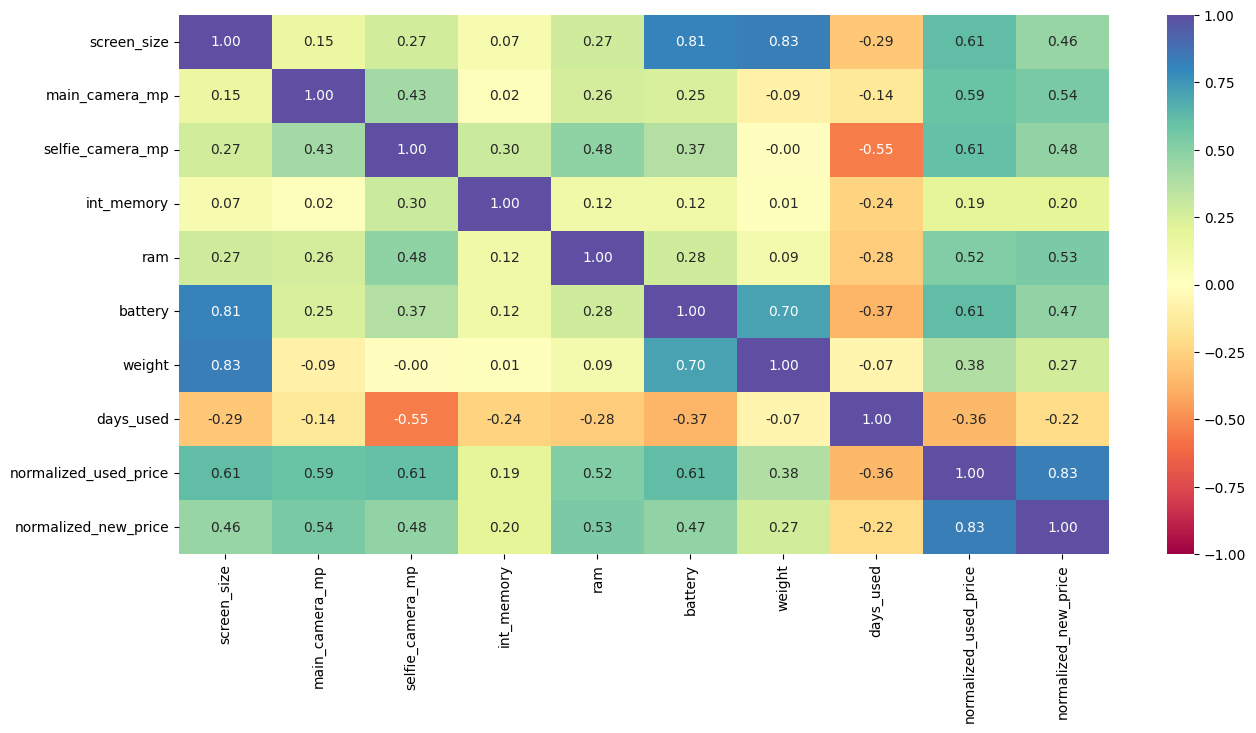

In [ ]:
cols = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    data[cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

####Insight: The new (original) price is highly correlated with used price, which makes sense if the device was expensive (or cheap) to begin with. After that, it is selfie_camera_mp, screen_size, battery, main_camera_mp and device age.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

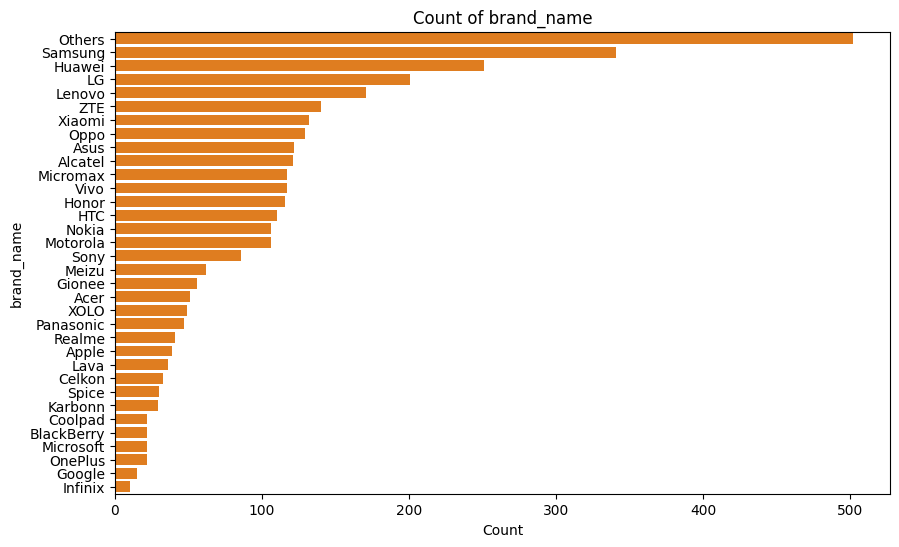

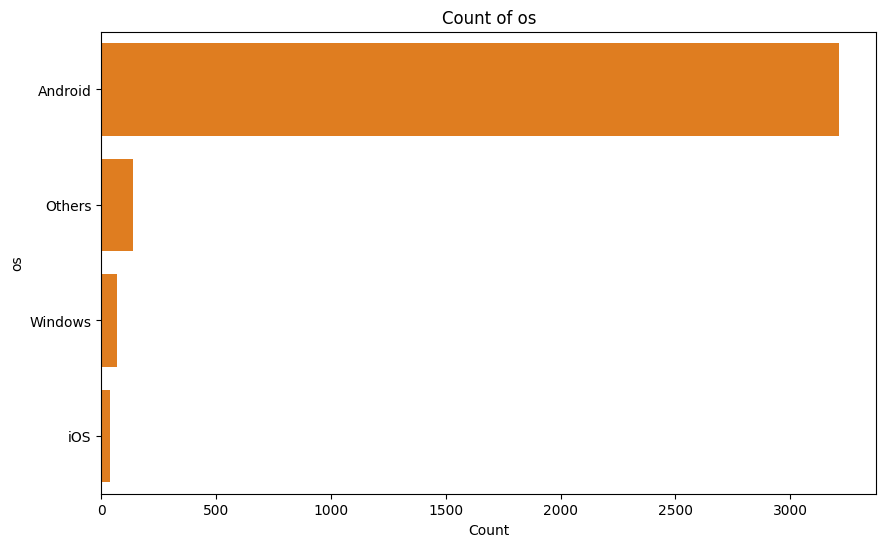

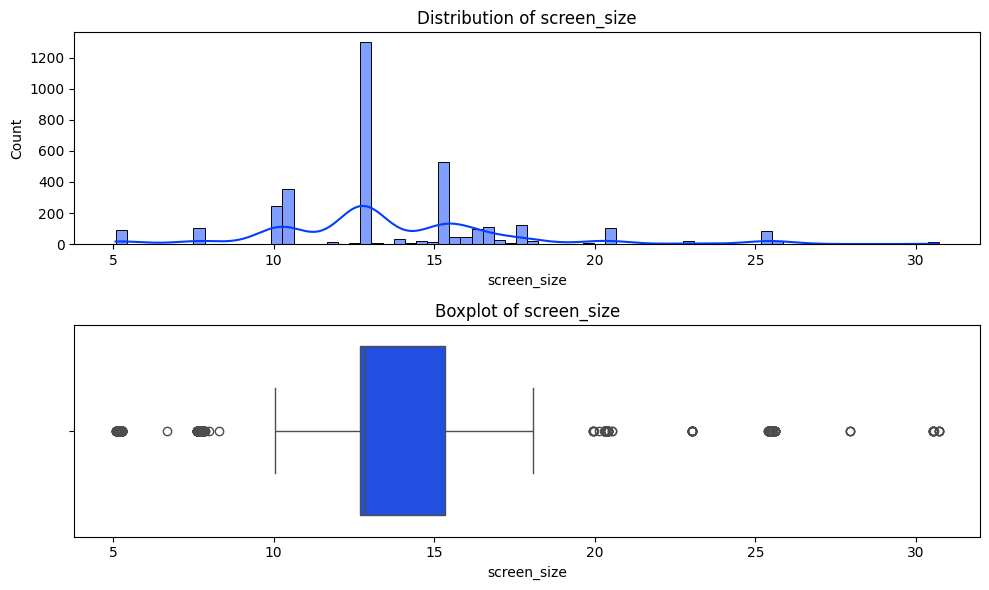

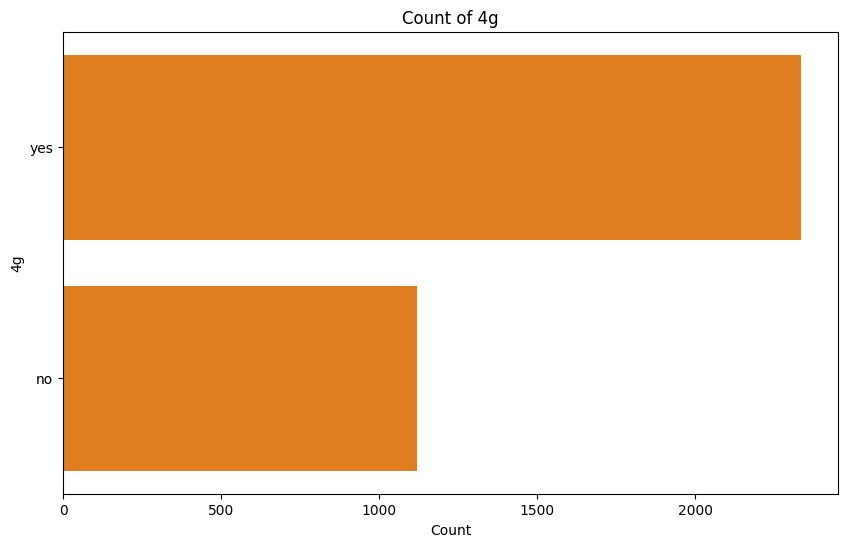

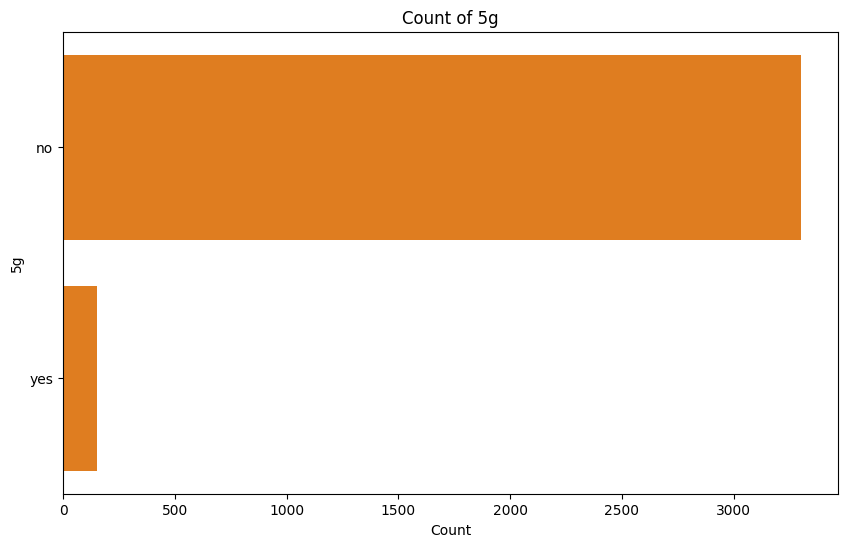

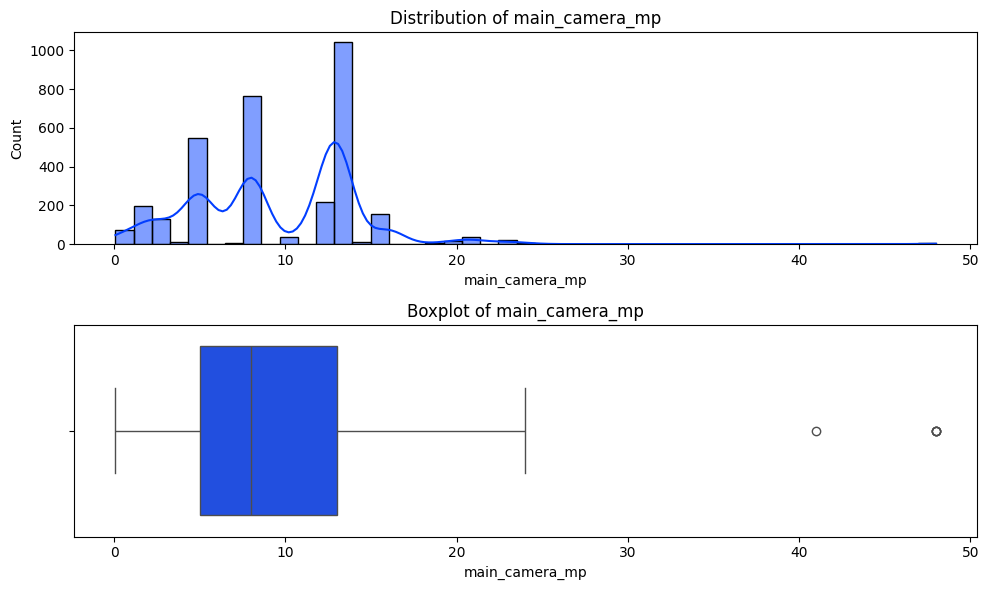

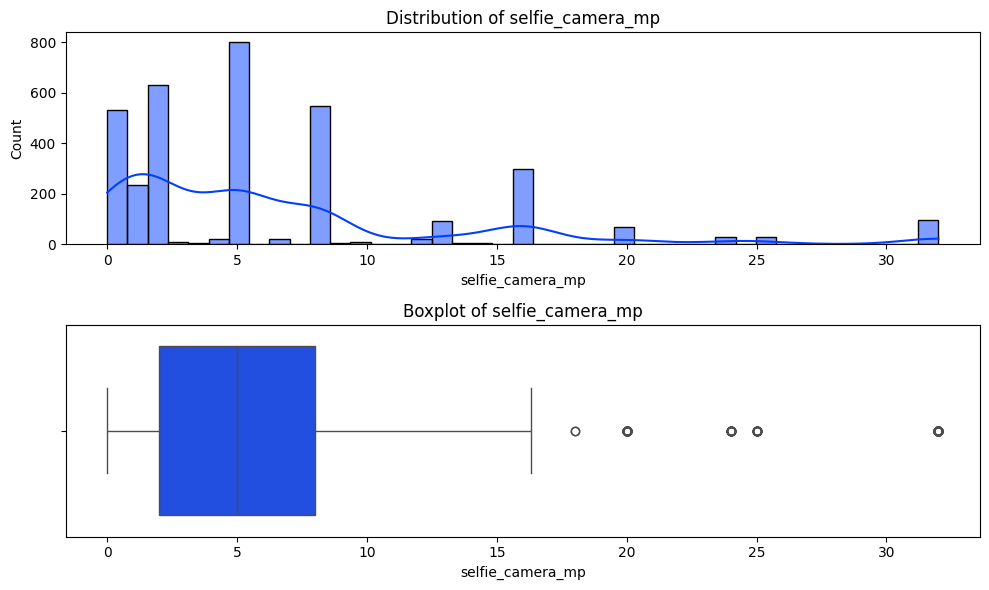

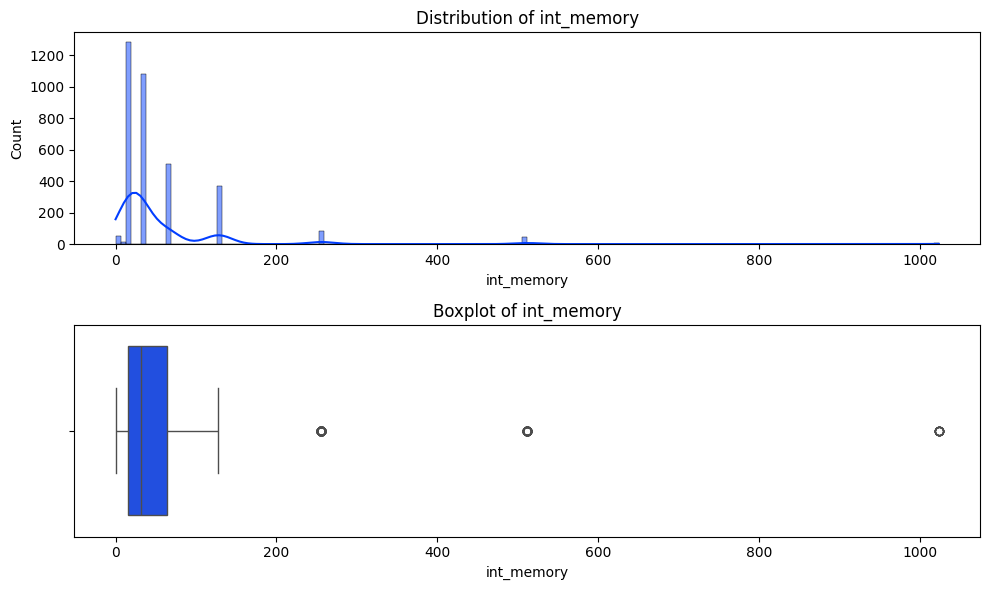

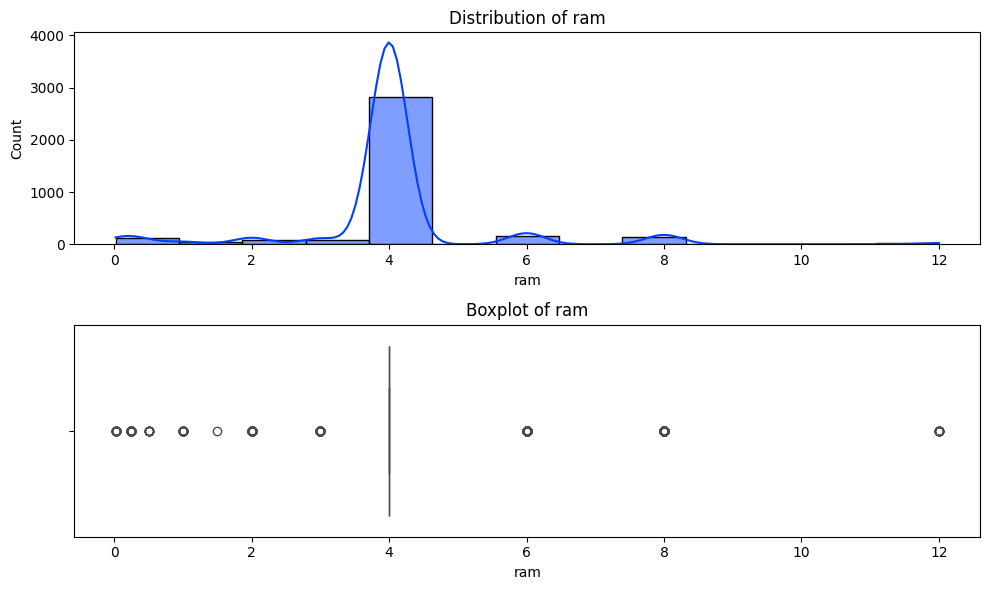

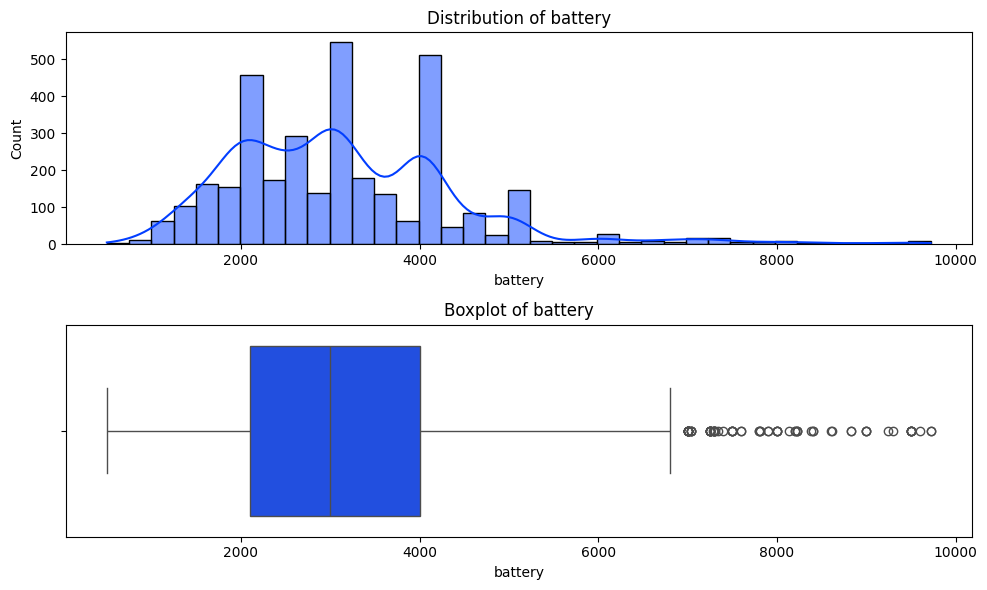

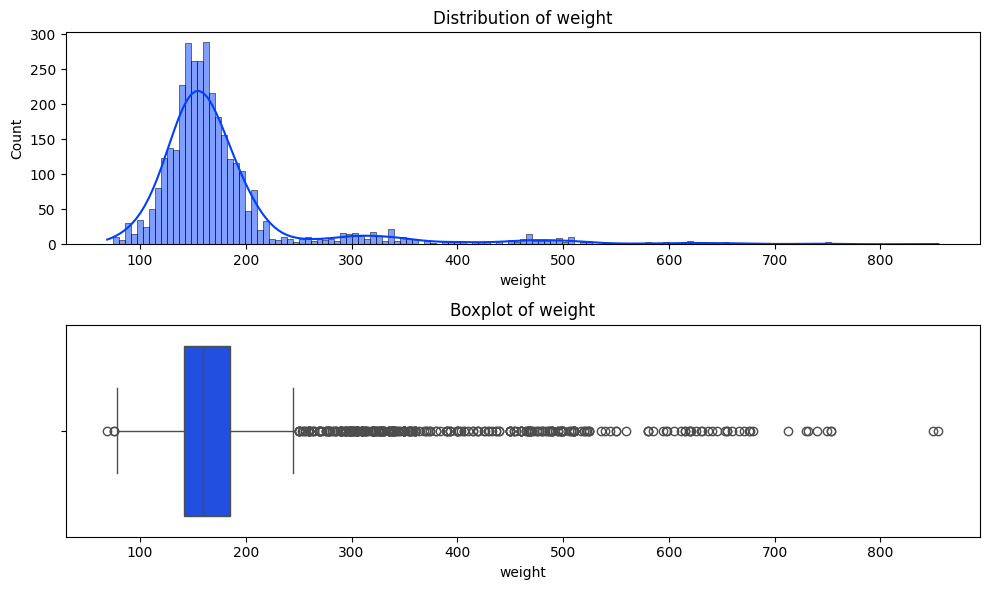

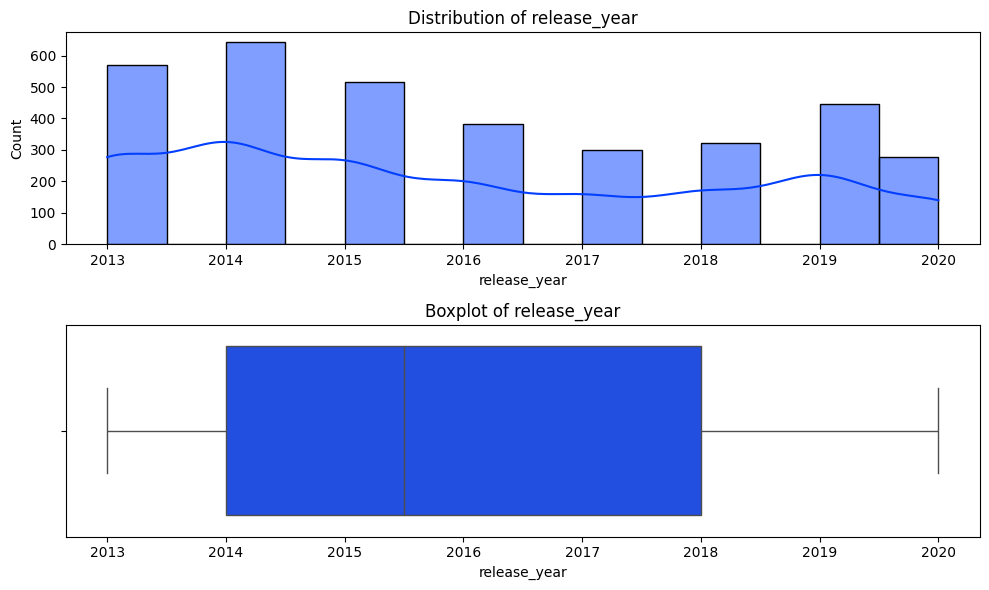

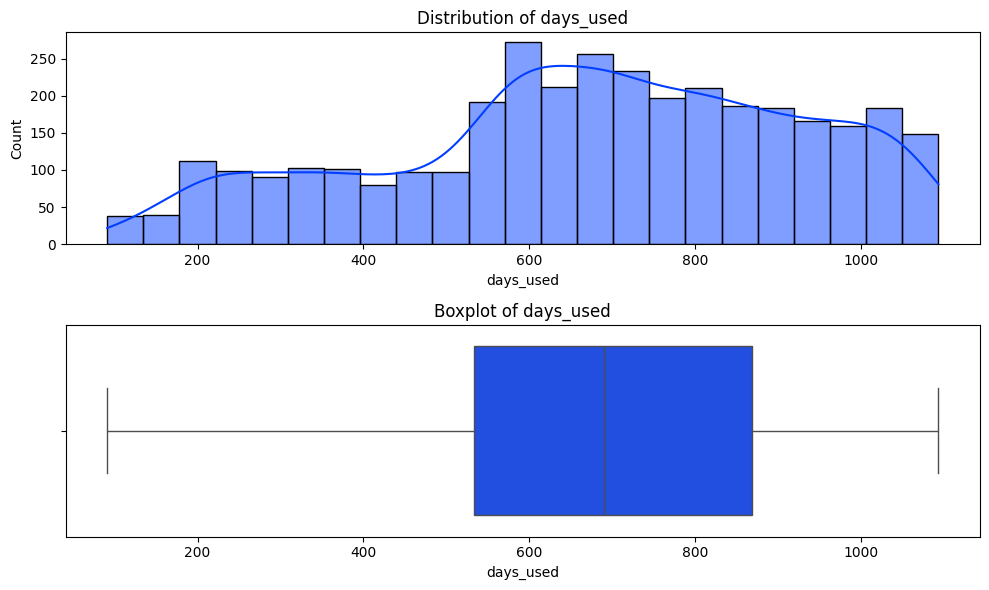

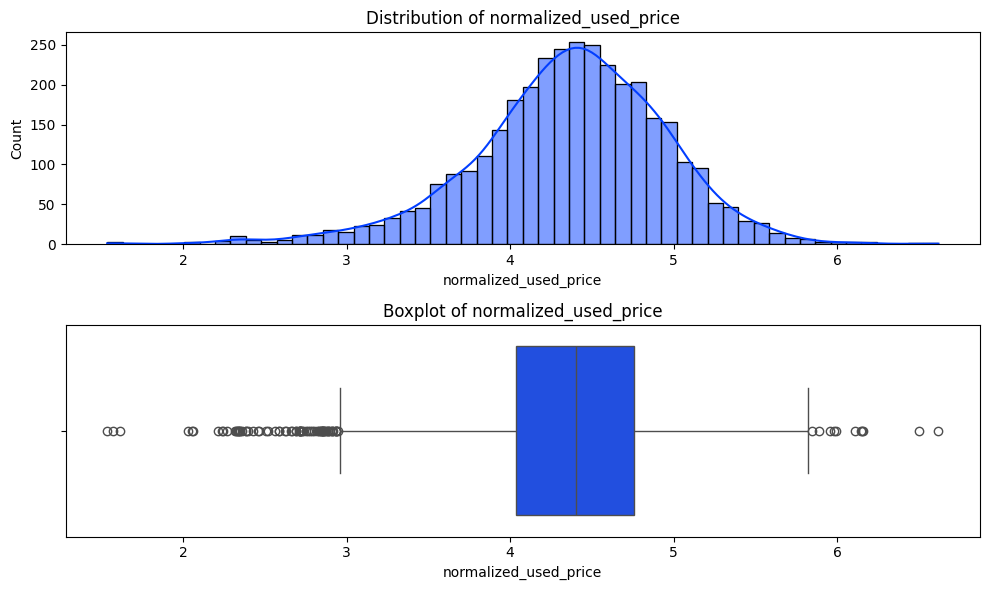

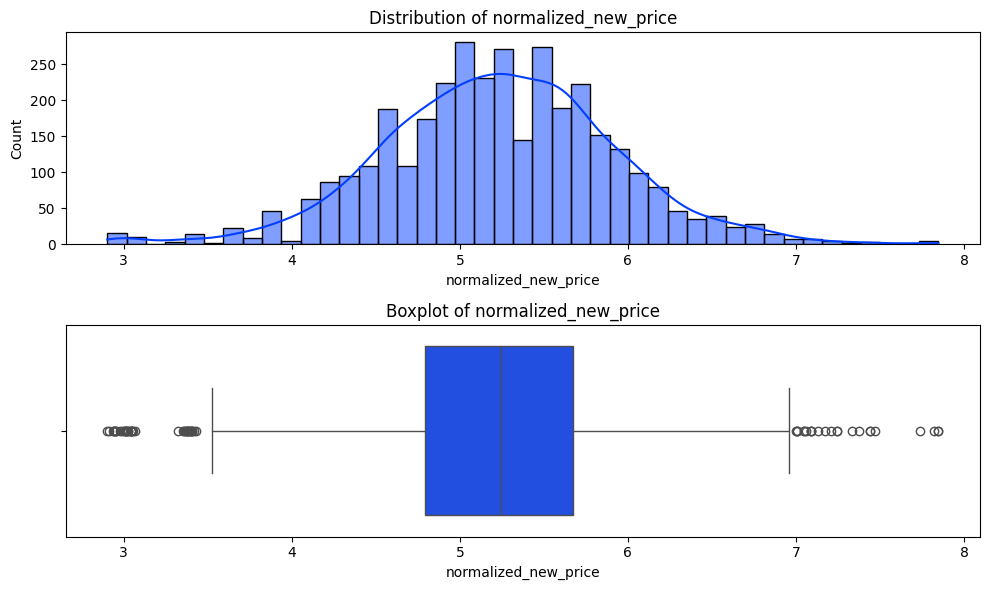

In [ ]:

def plot_all_features(df):
    # Identify numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    sns.set_palette('bright')
    for col in df.columns:
        plt.figure(figsize=(10, 6))

        if col in numerical_cols:
            # Plot histogram
            plt.subplot(2, 1, 1)
            sns.histplot(df[col], kde=True,color=sns.color_palette()[0])
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')

            # Plot boxplot
            plt.subplot(2, 1, 2)
            sns.boxplot(x=df[col])
            plt.title(f'Boxplot of {col}')
            plt.xlabel(col)
            plt.tight_layout()  # Adjust subplots to fit into the figure area

        elif col in categorical_cols:
            sns.countplot(y=df[col], order=df[col].value_counts().index,color=sns.color_palette()[1])
            plt.title(f'Count of {col}')
            plt.xlabel('Count')
            plt.ylabel(col)

        plt.show()

# Call the function to plot all features
plot_all_features(data)

In [ ]:
#brand name will probably not be useful since most fall into an "other" category
data.drop('brand_name', axis=1, inplace=True)


In [ ]:
current_year = 2021 #the year data was collected
data['device_age'] = current_year - data['release_year']

In [ ]:
#one-hot encode OS so that we can use it for analysis
data_encoded = pd.get_dummies(data, columns=['os', '4g', '5g'], drop_first=True)


In [ ]:
# Replace the missing values with median values of the columns.

medianFiller = lambda x: x.fillna(x.median())
data_encoded = data_encoded.apply(medianFiller, axis=0)

## EDA

- It is a good idea to explore the data once again after manipulating it.

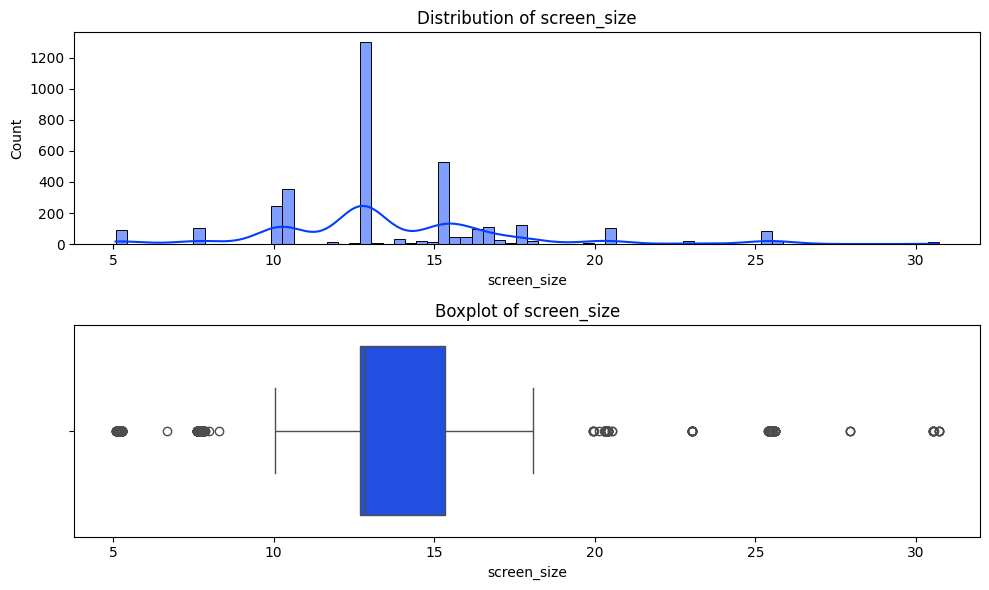

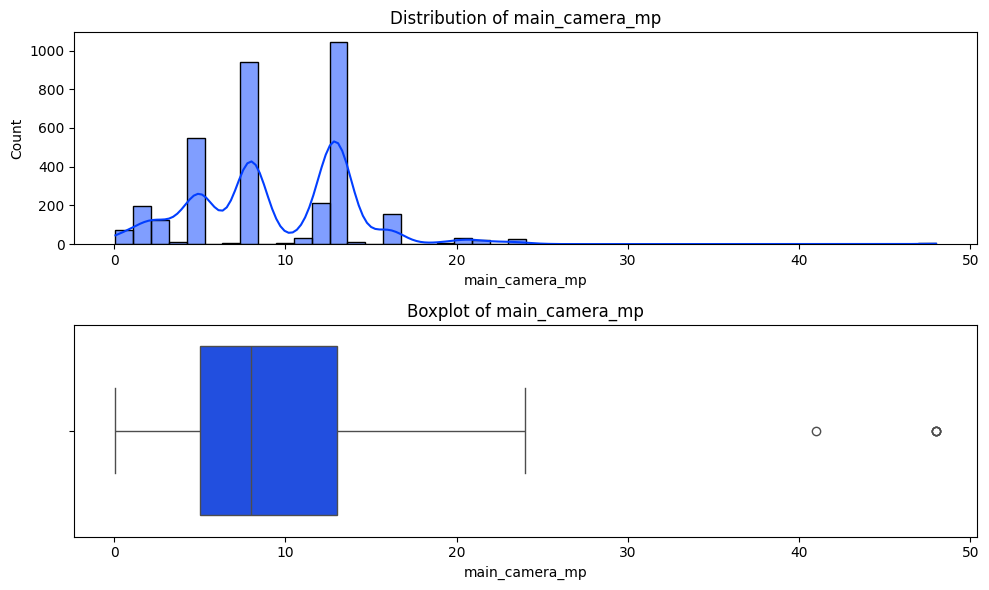

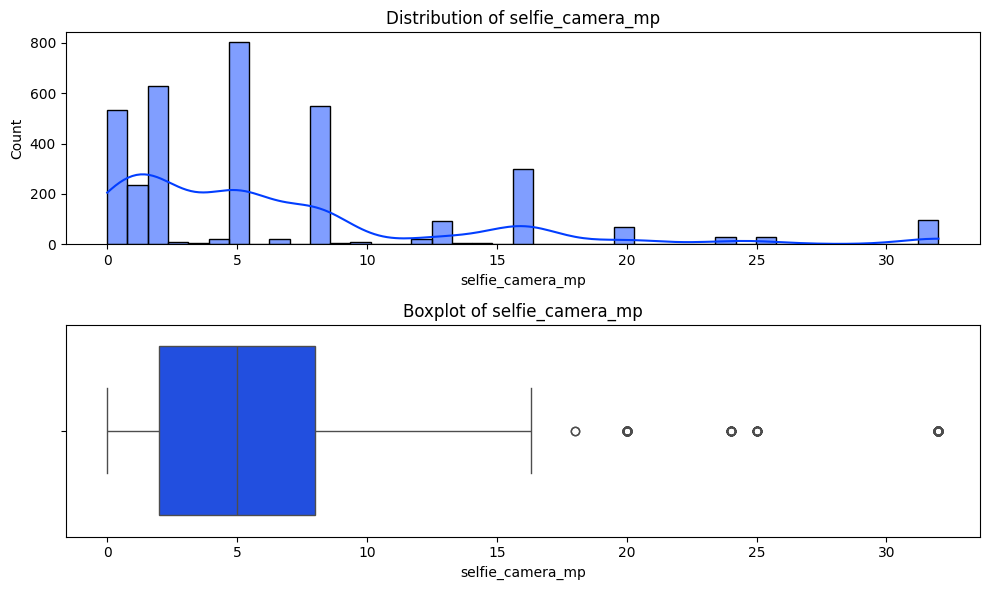

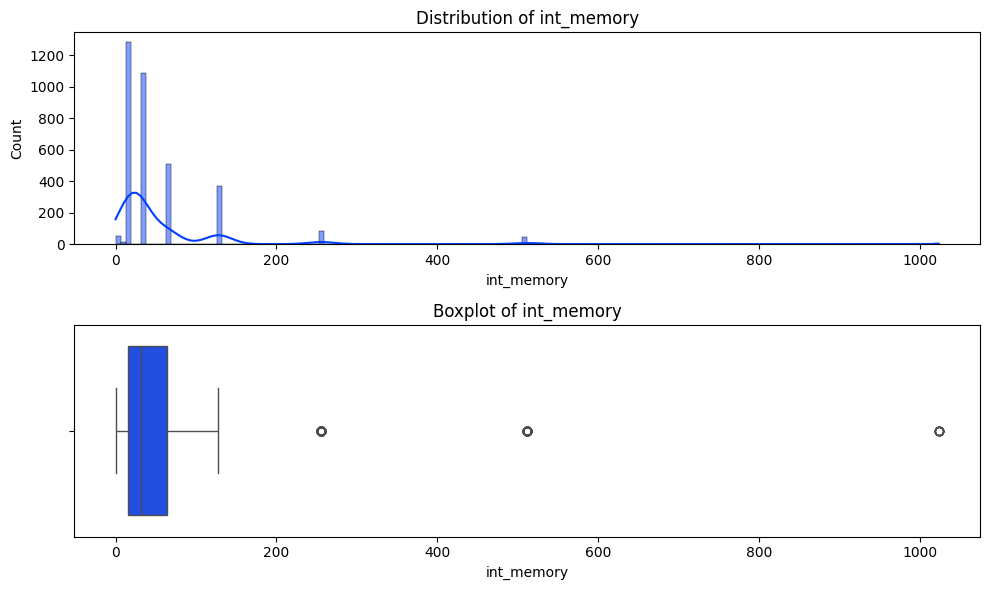

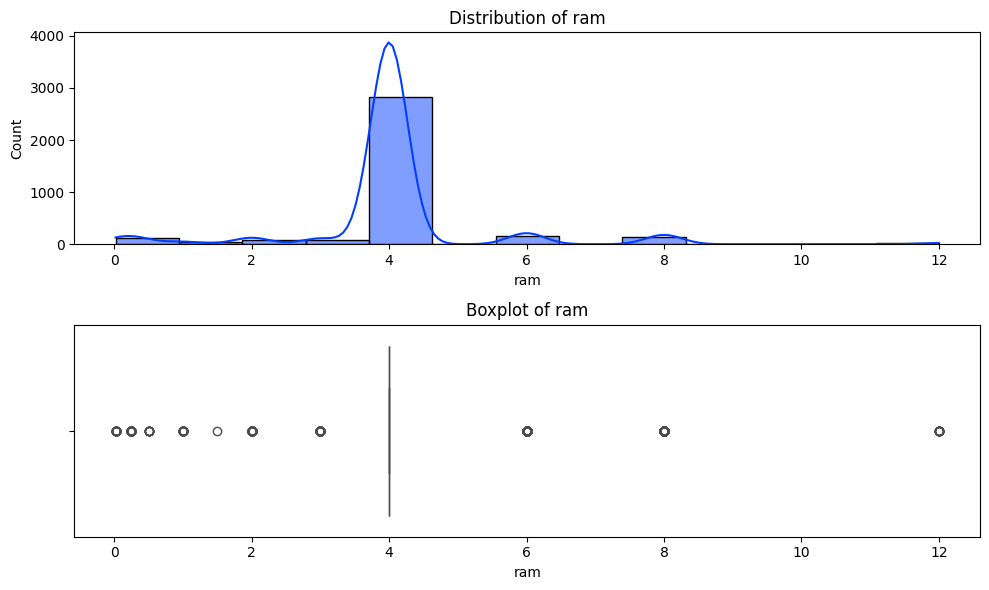

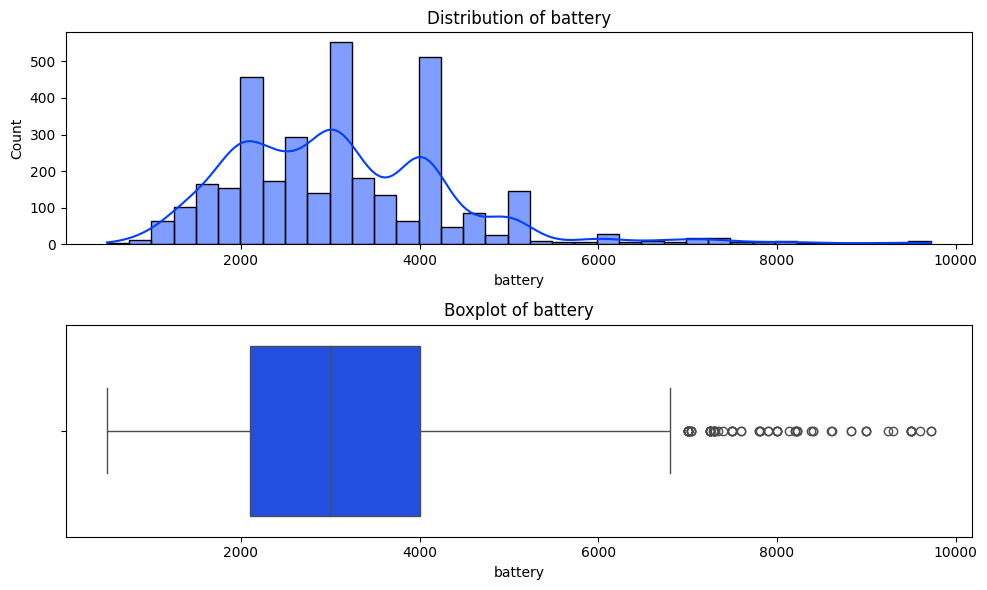

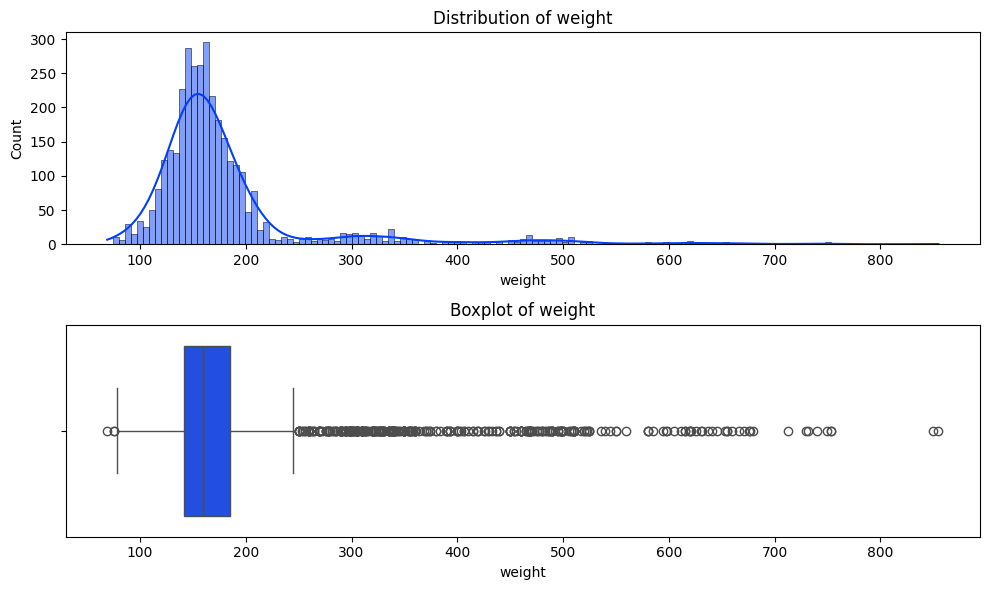

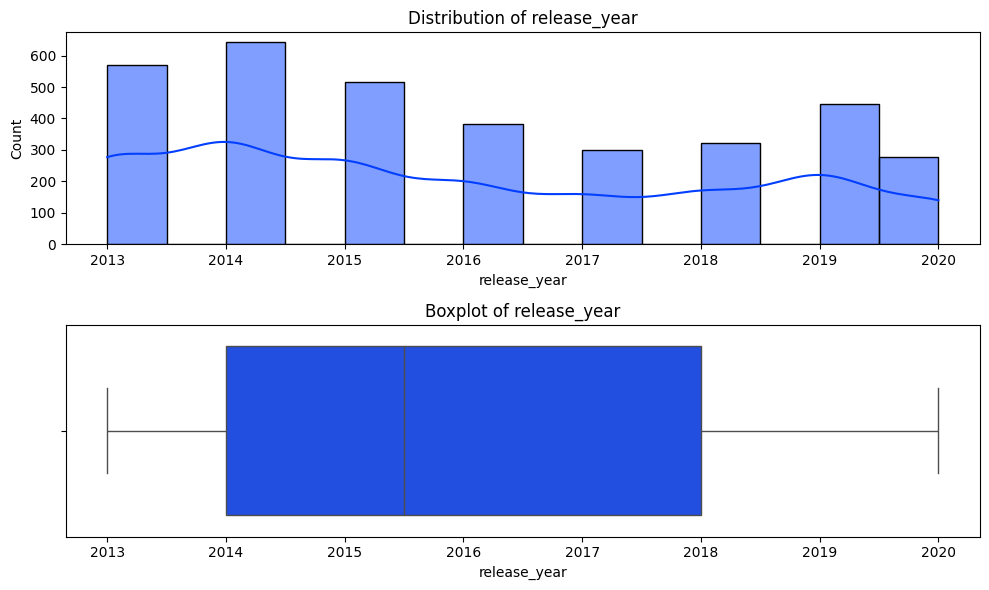

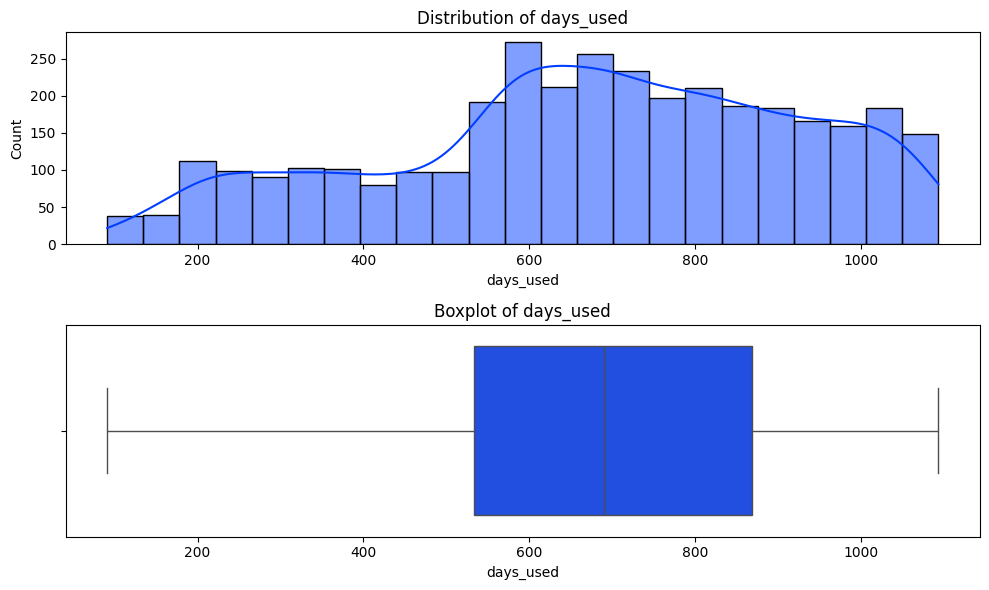

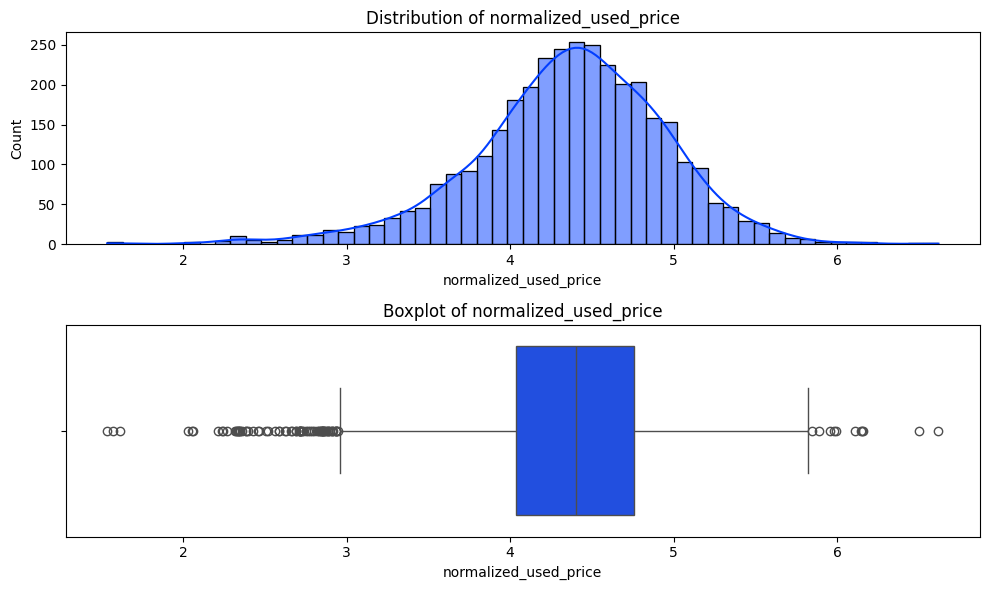

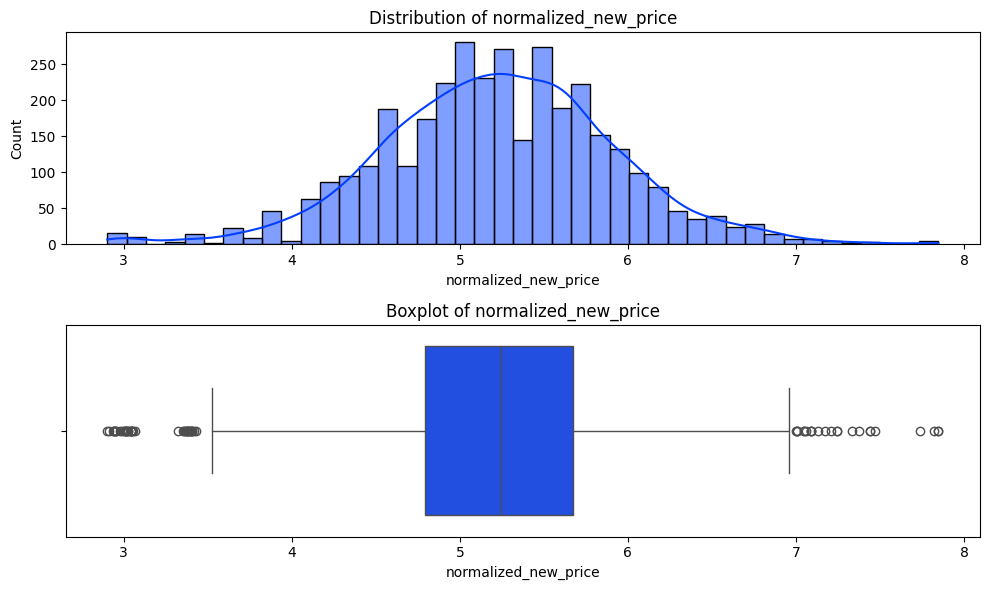

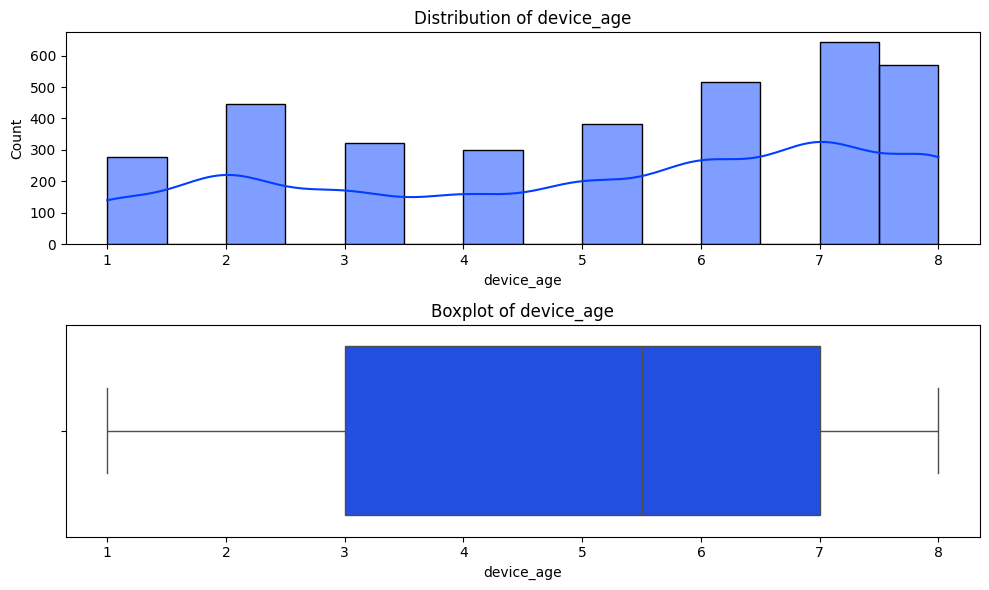

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
plot_all_features(data_encoded)

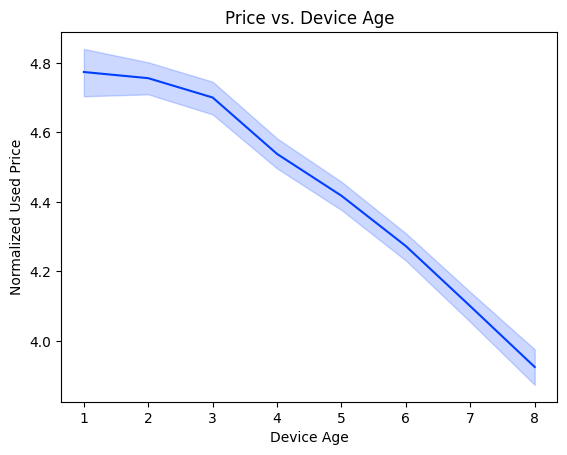

In [ ]:
# Lineplot for price and device age

sns.lineplot(data=data_encoded, x="device_age", y="normalized_used_price")
plt.title("Price vs. Device Age")
plt.xlabel("Device Age")
plt.ylabel("Normalized Used Price")
plt.show()


###Correlation check

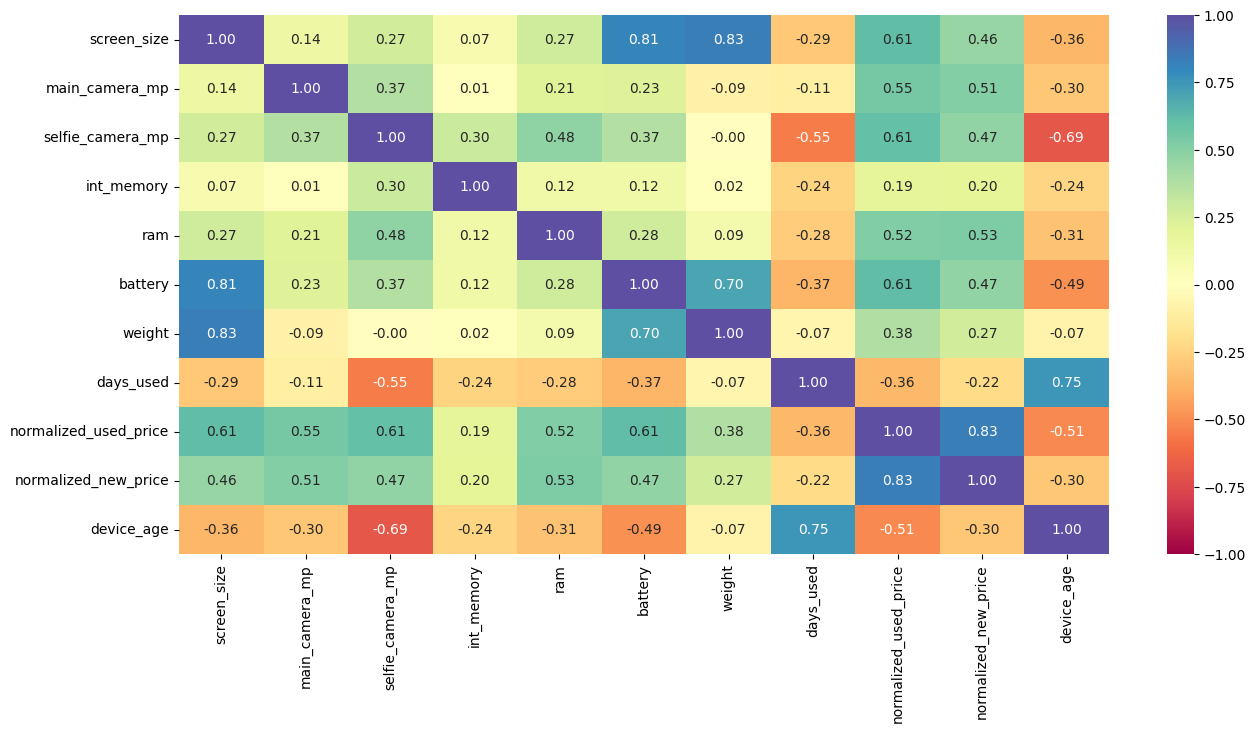

In [ ]:
cols = data_encoded.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    data_encoded[cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

####Insight: normalized used price is highly correlated with screen size, main camera mp, selfie camera mp, battery, normalized new price and device age.

###Outlier Detection

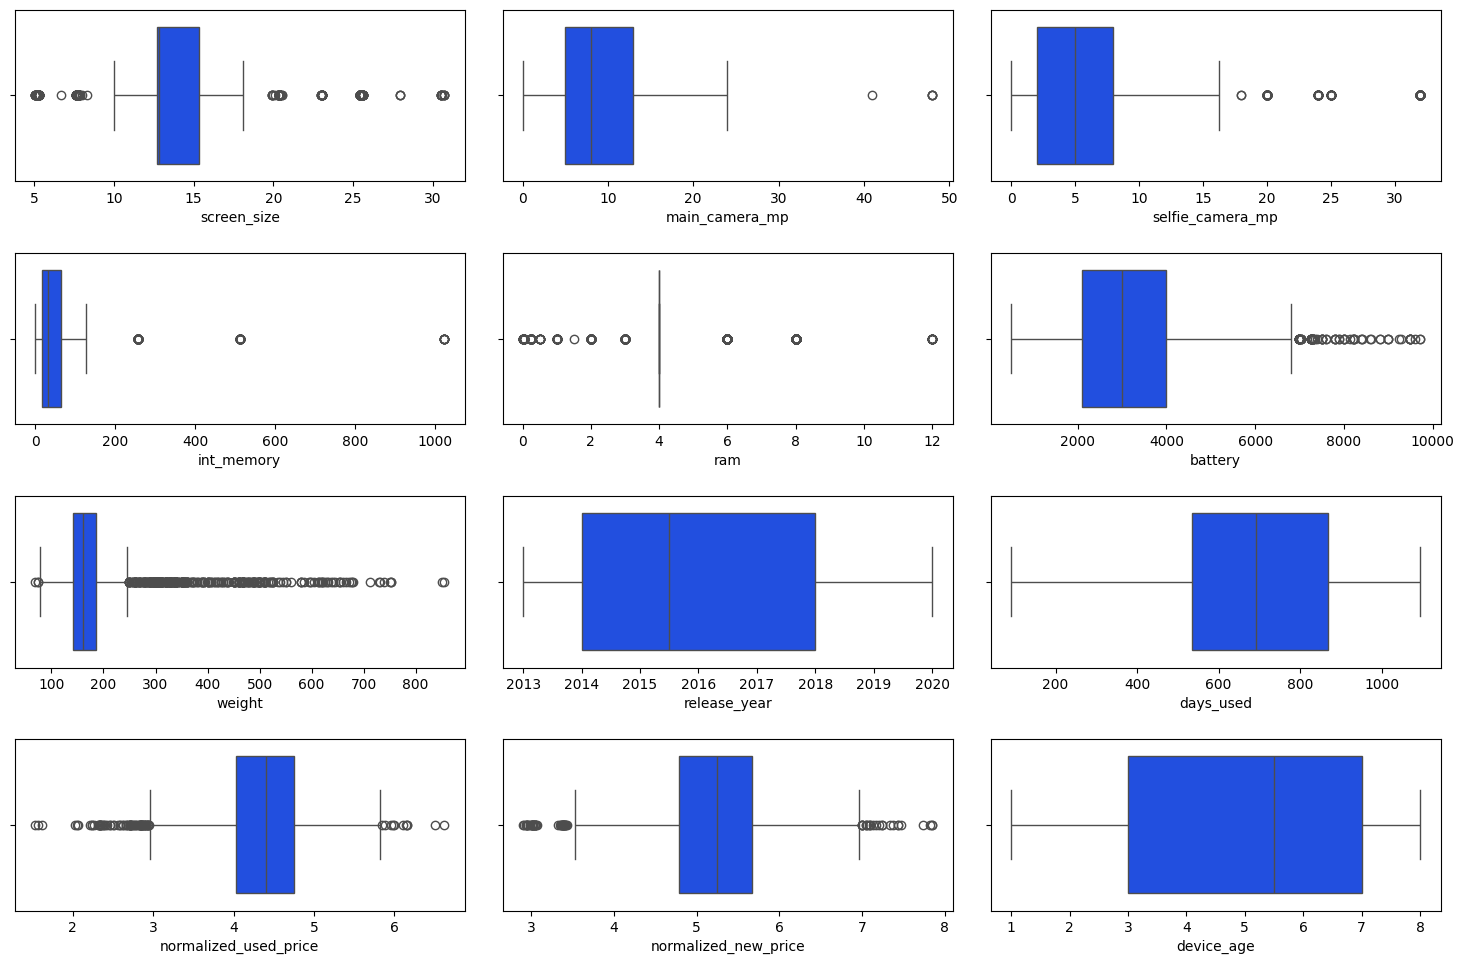

In [ ]:
# outlier detection using boxplot
num_cols = data_encoded.select_dtypes(include=np.number).columns.tolist()

n = len(num_cols)
cols = 3
rows = math.ceil(n / cols)  # Calculate the number of rows required

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)  # Use calculated rows for subplot placement
    sns.boxplot(data=data_encoded, x=variable)
    plt.tight_layout(pad=2)

plt.show()

###Insight: There are some outliers, but they seem to be legitimate datapoints.

## Model Building - Linear Regression

###Initial attempt at model building.

In [ ]:
#Define dependent and independent variables. We are now using the encoded dataset
#independent
X=data_encoded[['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'device_age', 'days_used', 'normalized_new_price']]
#dependent
y=data_encoded['normalized_used_price']
X = sm.add_constant(X)

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [ ]:
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1826.
Date:                   Sat, 13 Jul 2024   Prob (F-statistic):               0.00
Time:                           01:25:49   Log-Likelihood:                 107.50
No. Observations:                   3454   AIC:                            -193.0
Df Residuals:                       3443   BIC:                            -125.4
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

## Model Performance Check

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(ols_model, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233483,0.183768,0.839991,0.839259,4.403891


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

No multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,100.200492
1,screen_size,6.110651
2,main_camera_mp,1.721393
3,selfie_camera_mp,2.536365
4,int_memory,1.206607
5,ram,1.585091
6,battery,3.744198
7,weight,5.512011
8,device_age,3.767423
9,days_used,2.510131


####Insight: With VIF scores over 5 for screen size and weight, there appears to be some multicollinearity.

###Treat the multicollinearity

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.836833,0.235825
1,screen_size,0.834064,0.237817


In [ ]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,90.841170
1,main_camera_mp,1.700805
2,selfie_camera_mp,2.534984
3,int_memory,1.204152
4,ram,1.572468
5,battery,3.505630
6,weight,2.763104
7,device_age,3.647960
8,days_used,2.506358
9,normalized_new_price,2.300323


In [ ]:
col_to_drop = "weight"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,90.055364
1,screen_size,3.063195
2,main_camera_mp,1.568447
3,selfie_camera_mp,2.506265
4,int_memory,1.206468
5,ram,1.568505
6,battery,3.337413
7,device_age,3.544078
8,days_used,2.505920
9,normalized_new_price,2.337539


In [ ]:
x_train2

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,device_age,days_used,normalized_new_price
3026,1.0,10.29,8.0,0.3,16.0,4.0,1800.0,7,819,4.796204
1525,1.0,15.34,13.0,5.0,32.0,4.0,4050.0,5,585,5.434595
1128,1.0,12.70,13.0,5.0,32.0,4.0,2550.0,6,727,5.137914
3003,1.0,12.83,8.0,5.0,16.0,4.0,3200.0,6,800,5.189228
2907,1.0,12.88,13.0,16.0,16.0,4.0,2900.0,4,560,5.016220
...,...,...,...,...,...,...,...,...,...,...
2763,1.0,10.29,8.0,2.0,16.0,4.0,2100.0,8,802,5.006694
905,1.0,10.29,5.0,0.3,16.0,4.0,1800.0,8,850,5.195454
1096,1.0,15.77,13.0,24.0,64.0,4.0,3400.0,3,720,5.345392
235,1.0,15.90,13.0,32.0,128.0,6.0,3750.0,2,311,5.515845


####Collinearity has been dealt with. We will now rebuild the model.

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1378.
Date:                   Sat, 13 Jul 2024   Prob (F-statistic):               0.00
Time:                           01:25:50   Log-Likelihood:                 67.194
No. Observations:                   2417   AIC:                            -114.4
Df Residuals:                       2407   BIC:                            -56.49
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

###Dealing with high p-values

We will use a formula to check each column for high p values and remove them.

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'device_age', 'days_used', 'normalized_new_price']


###These are our selections for variables now: ['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'device_age', 'days_used', 'normalized_new_price']

In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1771.
Date:                   Sat, 13 Jul 2024   Prob (F-statistic):               0.00
Time:                           01:25:50   Log-Likelihood:                 66.389
No. Observations:                   2417   AIC:                            -116.8
Df Residuals:                       2409   BIC:                            -70.46
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235415,0.184924,0.837332,0.836792,4.434564


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239177,0.184158,0.841395,0.840161,4.488739


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239177,0.184158,0.841395,0.840161,4.488739


Linearity

In [ ]:
# Create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.878983,0.208505
1525,4.448399,4.566588,-0.118188
1128,4.315353,4.308310,0.007042
3003,4.282068,4.244366,0.037702
2907,4.456438,4.450973,0.005465


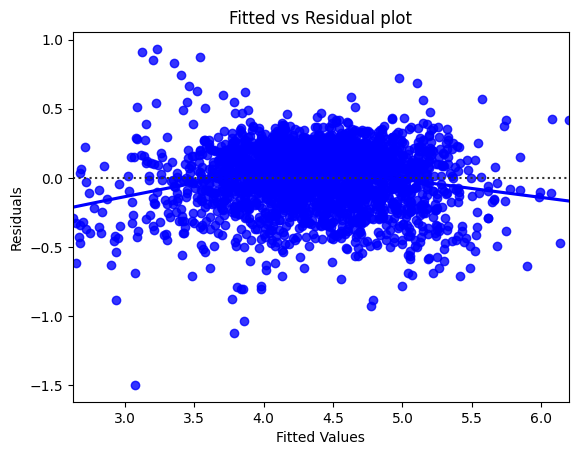

In [ ]:
# Plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="blue", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Insight: There is no pattern, just a blob, so linearity and independence are satisfied.

Normality

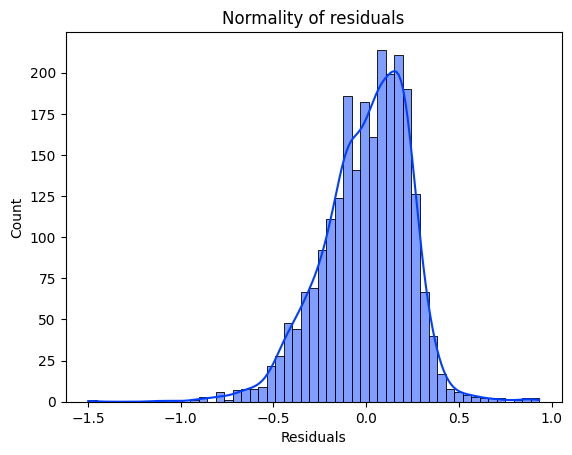

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

####Insight: the result is a slightly skewed but mostly normal curve.

###Q-Q plot


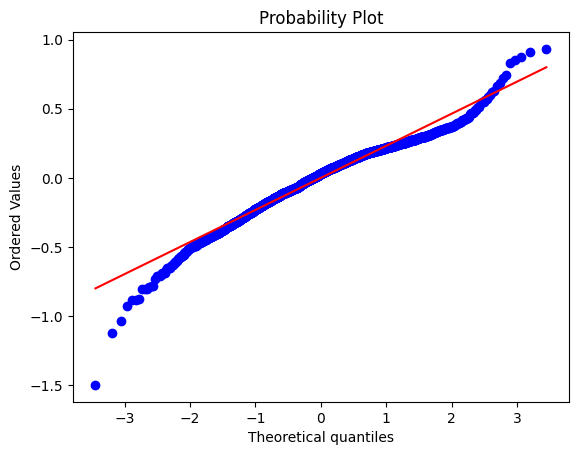

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

####Insight: Residuals follow a straight line as they should.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9719365835189819, pvalue=2.305325709997579e-21)

####Insight: Results aren't strictly normal, but acceptable.

Homoscedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0606996919422689), ('p-value', 0.15371851296542877)]

####Insight: Since p-value > 0.05, we can say that the residuals are homoscedastic.

##Predictions on Test Data

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.372448
2341,3.696103,3.975282
1913,3.592093,3.770407
688,4.306495,4.082903
650,4.522115,5.132813
2291,4.259294,4.386391
40,4.997685,5.430093
1884,3.875359,4.131740
2538,4.206631,4.065879
45,5.380450,5.332632


###Recreating the final model

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1771.
Date:                   Sat, 13 Jul 2024   Prob (F-statistic):               0.00
Time:                           01:25:52   Log-Likelihood:                 66.389
No. Observations:                   2417   AIC:                            -116.8
Df Residuals:                       2409   BIC:                            -70.46
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235415,0.184924,0.837332,0.836792,4.434564


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239177,0.184158,0.841395,0.840161,4.488739


## Actionable Insights and Recommendations

The model explains ~ 84% of the variation in the data.
The train and test RMSE and MAE are low and comparable, so our model is not overfitted.
The MAPE indicates that we are off by only about 4.4% from the actual value.

The features that are most significant are:
'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'device_age', 'days_used', 'normalized_new_price'

*   As screen size increases 1 unit, price increases .0428 units, all other variables held constant.

*   As main camera megapixels increases 1 unit, price increases .0192 units, all other variables held constant.

*   As selfie camera megapixels increases 1 unit, price increases .0133 units, all other variables held constant.

*   As ram increases 1 unit, price increases .0182 units, all other variables held constant.

*   As device age increases 1 unit, price decreases .00133 units, all other variables held constant.

*   As days used increases 1 unit, price decreases 0.00006142 units, all other variables held constant. (Interestingly, the analysis that we did not seem to indicate overlap with device age on this perhaps because the device was not necessarily used for every day it was in existence).

*   The higher the original price of the device in the beginning, the higher the used device price will be (.4312 per unit all other variables held constant).

If the company wants to improve their standing in the used device market, they should look for devices that were not only valuable to begin with, but have good cameras, higher screen sizes and ram. In addition, the more lightly used and newer they are the better.







___